NASDAQ Sharpe Ratio analysis

In this study we'll compute the Sharpe Ratio for the top 100 stocks of the NASDAQ (in term of market capitalisation), and see if some represent good investment opportunities. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from pandas_datareader.data import DataReader
from datetime import date
import quandl

plt.style.use('fivethirtyeight')
%matplotlib inline

IMPORTING DATA 

First, we need the stock market value of the NASDAQ, which will play the role of the benchmark in our analysis.

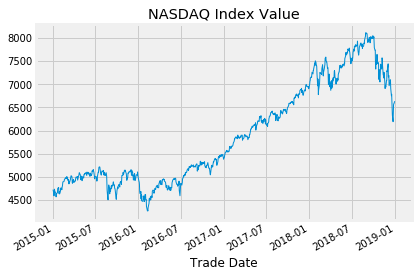

In [2]:
# Get the financial data of the NASDAQ

start = date(2015, 1, 1)
end = date(2019, 1, 1)

index_ref = quandl.get('NASDAQOMX/COMP-NASDAQ', start_date = start, end_date = end)['Index Value']
index_ref.plot(linewidth = 1, title = 'NASDAQ Index Value')

Now we need to gather the stock's financial data.

In [3]:
# Getting the stocks data

stocks_data = pd.read_excel(r'Listings.xlsx', index_col = 0, sheet_name='nasdaq')

stocks_data.head()

,Company Name,Sector,Industry
Stock Symbol,,,
AAPL,Apple Inc.,Technology,Computer Manufacturing
GOOGL,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing"
GOOG,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing"
MSFT,Microsoft Corporation,Technology,Computer Software: Prepackaged Software
AMZN,"Amazon.com, Inc.",Consumer Services,Catalog/Specialty Distribution


BASIC INSIGHT OF THE DATA

In [4]:
stocks_data.info()
stocks_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 3163 entries, AAPL to ZIONZ
Data columns (total 3 columns):
Company Name    3163 non-null object
Sector          2763 non-null object
Industry        2763 non-null object
dtypes: object(3)
memory usage: 98.8+ KB


,Company Name,Sector,Industry
count,3163,2763,2763
unique,2885,12,127
top,Liberty Media Corporation,Health Care,Major Pharmaceuticals
freq,6,645,349


As we can see, there are 400 missing values in the "Sector" and "Industry" columns, and their dtype is 'object'.

We'll choose the 'category' dtype instead, to save memory.
The missing values mostly correspond to ETFs (or trackers : an fund that replicates a large market index), not company stocks : we can drop them.

Also there is duplicates in the company names that we want to get rid of. 

DATA CLEANING

In [5]:
stocks_data['Sector'] = stocks_data['Sector'].astype('category')
stocks_data['Industry'] = stocks_data['Industry'].astype('category')

stocks_data = stocks_data.drop_duplicates()
stocks_data = stocks_data.dropna()

stocks_data.info()    # we just saved 46KB of memory

<class 'pandas.core.frame.DataFrame'>
Index: 2507 entries, AAPL to VVPR
Data columns (total 3 columns):
Company Name    2507 non-null object
Sector          2507 non-null category
Industry        2507 non-null category
dtypes: category(2), object(1)
memory usage: 52.9+ KB


If you want to check the list of duplicates and missing values, to decide whether to keep them or not, you can use the following code : 

    duplicates = stocks_data[stocks_data['Company Name'].duplicated(keep=False)]

    missing_values = stocks_data[stocks_data.isnull().any(axis=1)]

DATA ANALYSIS

Now we have a clean dataset with no duplicates or missing values. We can start the financial analysis.

In the Sharpe Ratio formula, we need the daily average rate of return of a stock and its volatility (standard deviation of the market price) to make comparison with the index daily performance.

We'll use the pandas_datareader library to import the daily price of each stock of the NASDAQ.

In [6]:
# List of the stocks tickers

stocks_ticker = stocks_data.index.tolist()

stocks_ticker[:10]

['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB', 'CMCSA', 'INTC', 'CSCO', 'AMGN', 'KHC']

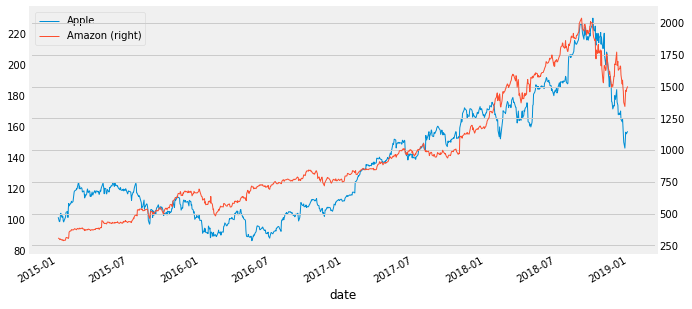

In [7]:
ticker1 = stocks_ticker[:50]  # IEX symbol list is limited to 100 elements : we must operate 2 selections

stocks1 = DataReader(ticker1, 'iex', start, end)['close']

df = stocks1[['AAPL', 'AMZN']]
df.index = pd.to_datetime(df.index)   # to show the date on the x-axis

df.AAPL.plot(figsize=(10, 5), label="Apple", legend=True, linewidth = 1)
df.AMZN.plot(secondary_y=True, figsize=(10, 5), label="Amazon", legend=True, linewidth = 1)  # secondary_y plot 2 charts on the same graph

In [8]:
ticker2 = stocks_ticker[50:101]
stocks2 = DataReader(ticker2, 'iex', start, end)['close']

stocks = pd.concat([stocks1, stocks2], axis = 1)  # we join the 2 50-elements dataframes
stocks.head()

Symbols,AAPL,ADBE,ADP,AMAT,AMGN,AMOV,AMZN,ATVI,AVGO,BIDU,...,SWKS,SYMC,TROW,ULTA,VIA,VRSK,WDC,WLTW,XLNX,XRAY
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,101.5280,72.340,75.6402,23.3365,143.2089,18.9165,308.52,19.5442,91.7187,223.080,...,69.2094,19.1659,74.3095,126.84,67.8740,63.8458,97.7303,NaN,39.4566,50.6767
2015-01-05,98.6678,71.980,75.5857,22.5885,141.5071,18.7244,302.19,19.2723,90.2525,219.785,...,68.0861,18.8963,72.6026,127.15,66.0211,63.0174,96.4382,NaN,38.7281,50.3254
2015-01-06,98.6771,70.530,74.9545,21.7377,136.9481,18.6022,295.29,18.9131,88.1999,220.180,...,65.9150,18.6042,71.3202,126.95,64.7708,62.7978,94.2877,NaN,38.1716,49.7009
2015-01-07,100.0607,71.110,75.6129,21.9387,141.7310,19.0736,298.42,18.5005,90.5824,224.350,...,67.0006,18.7764,72.3686,130.58,64.2401,62.8377,95.7037,NaN,38.1851,50.9890
2015-01-08,103.9053,72.915,77.3475,22.6399,141.2205,19.4926,300.46,18.6898,95.1092,229.210,...,70.0400,19.1209,73.2264,132.24,65.1306,63.4665,97.6861,NaN,39.0358,52.2479


We now have the daily stock prices. It's time to compute the average rate of return and the volatility !

count    1005.000000
mean        0.039048
std         1.028284
min        -4.425388
25%        -0.383917
50%         0.077682
75%         0.556671
max         5.836342
Name: Index Value, dtype: float64

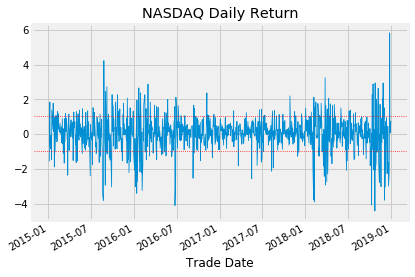

In [9]:
# Daily return of NASDAQ

index_daily_return = index_ref.pct_change() * 100  # in %
h_line_sup = index_daily_return.mean() + index_daily_return.std()  # range of daily return 1σ away from the mean
h_line_inf = index_daily_return.mean() - index_daily_return.std()

index_daily_return.plot(linewidth = 0.8, title='NASDAQ Daily Return')
plt.axhline(y = h_line_sup, color = 'r', linestyle = ':', linewidth = 0.8)
plt.axhline(y = h_line_inf, color = 'r', linestyle = ':', linewidth = 0.8)

index_daily_return.describe()

Symbols,AAPL,ADBE,ADP,AMAT,AMGN,AMOV,AMZN,ATVI,AVGO,BIDU,...,SWKS,SYMC,TROW,ULTA,VIA,VRSK,WDC,WLTW,XLNX,XRAY
date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,-2.817154,-0.497650,-0.072052,-3.205279,-1.188334,-1.015516,-2.051731,-1.391206,-1.598583,-1.477049,...,-1.623045,-1.406665,-2.297015,0.244402,-2.729911,-1.297501,-1.322108,NaN,-1.846332,-0.693218
2015-01-06,0.009426,-2.014448,-0.835079,-3.766518,-3.221746,-0.652624,-2.283332,-1.863815,-2.274286,0.179721,...,-3.188757,-1.545805,-1.766328,-0.157295,-1.893789,-0.348475,-2.229925,NaN,-1.436941,-1.240924
2015-01-07,1.402149,0.822345,0.878400,0.924661,3.492491,2.534109,1.059975,-2.181557,2.701250,1.893905,...,1.646970,0.925597,1.469990,2.859393,-0.819351,0.063537,1.501787,NaN,0.035367,2.591704
2015-01-08,3.842268,2.538321,2.294053,3.196178,-0.360189,2.196754,0.683600,1.023216,4.997439,2.166258,...,4.536377,1.834750,1.185321,1.271251,1.386206,1.000673,2.071393,NaN,2.227832,2.468964


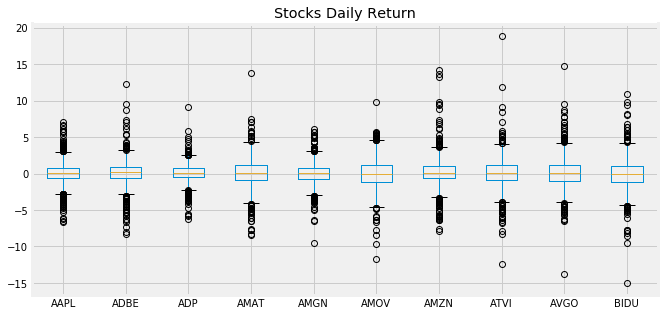

In [10]:
# Stocks daily return

stocks_daily_return = stocks.pct_change() * 100   

stocks_daily_return.iloc[:, :10].plot(figsize = (10, 5), title='Stocks Daily Return', kind = 'box')
stocks_daily_return.head()

In [11]:
# Average daily return

avg_index_daily_return = index_daily_return.mean()
avg_stocks_daily_return = stocks_daily_return.mean()  # 0.039%

avg_stocks_daily_return_df = pd.DataFrame(avg_stocks_daily_return)
avg_stocks_daily_return_df.columns = ['Daily return in %']

avg_stocks_daily_return_df.head()

,Daily return in %
Symbols,
AAPL,0.055401
ADBE,0.127819
ADP,0.061952
AMAT,0.053061
AMGN,0.041093


In [12]:
# Risk of each investment

index_volatility = index_daily_return.std()   # 1.03%
stocks_volatility = stocks_daily_return.std()  

stocks_volatility_df = pd.DataFrame(stocks_volatility)
stocks_volatility_df.columns = ['Volatility in %']

stocks_volatility_df.head()

,Volatility in %
Symbols,
AAPL,1.548310
ADBE,1.693239
ADP,1.242198
AMAT,1.993004
AMGN,1.502969


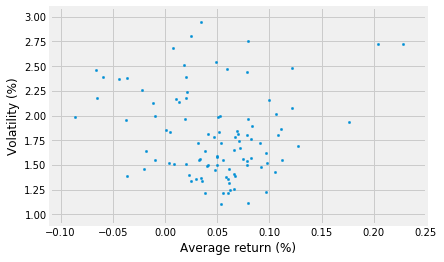

In [13]:
plt.axis([-0.11, 0.25, 0.9, 3.1])

plt.scatter(avg_stocks_daily_return, stocks_volatility, s = 5)
plt.xlabel('Average return (%)')
plt.ylabel('Volatility (%)')

plt.show()

SHARPE RATIO

Finally we can compute our Sharpe Ratio for the top 100 securities of the NASDAQ.

Notice that we multiply the result by the square root of 252. It's a way to annualize the ratio (we count 252 trading days in a year).

In [14]:
import numpy as np

stocks_SharpeRatio = ((avg_stocks_daily_return - avg_index_daily_return) / stocks_volatility) * np.sqrt(252)

stocks_SharpeRatio_df = pd.DataFrame(stocks_SharpeRatio)
stocks_SharpeRatio_df.columns = ['Sharpe Ratio']

# All together
stocks_stats = pd.concat([stocks_data, avg_stocks_daily_return_df, stocks_volatility_df, stocks_SharpeRatio_df], axis=1, sort=False)
stocks_stats.head()

,Company Name,Sector,Industry,Daily return in %,Volatility in %,Sharpe Ratio
AAPL,Apple Inc.,Technology,Computer Manufacturing,0.055401,1.548310,0.167660
GOOGL,Alphabet Inc.,Technology,"Computer Software: Programming, Data Processing",0.078775,1.499629,0.420529
MSFT,Microsoft Corporation,Technology,Computer Software: Prepackaged Software,0.097975,1.518697,0.615942
AMZN,"Amazon.com, Inc.",Consumer Services,Catalog/Specialty Distribution,0.175961,1.930075,1.126086
FB,"Facebook, Inc.",Technology,Technology,0.067159,1.783148,0.250258


In [15]:
# The Ultimate top 10
stocks_SharpeRatio_df.nlargest(10, 'Sharpe Ratio')

,Sharpe Ratio
Symbols,
AMZN,1.126086
NVDA,1.101408
NFLX,0.960119
ADBE,0.832250
CME,0.749513
ISRG,0.747803
CPRT,0.742367
AVGO,0.634213
PYPL,0.618953


If you wanted to build a 10-stocks portfolio, here is the best selection you could have make during this 5-years period. These stock are the best combinaison in term of profitability and risk-avoidance.

Amazon and Nvidia are the clear winners on the market, and if you were visionary enought to put your money in those companies back in 2015, you would have enjoyed respectively a +410% and +565% cumulative performance.


At the very beginning, we said that a Sharpe Ratio > 1 was required to have a stock that both : 1) beat the index's rate of return, and 2) does it at a lesser risk.
It's quite surprising to see that only 2 companies among the top 100 of the NASDAQ manage to do so. It seems to support Warren Buffet's advice to most investors, which is basically "Buy a low-cost index fund and wait".


I'll probably make another shorter analysis using the Sharpe Ratio, but this time we'll focus on each industry (Technology, Finance, Health care ...), as well a study of a very specific portfolio selection you could have make back in time. 